# Oscilación fuerzas de flotabilidad
---

En el océano la fuerza de gravedad no puede actuar de forma plena dado que en este medio va a influir las densidades de los objetos ($\rho_{\mathrm{obj}}$) respectos a la densidad del agua ($\rho_{\mathrm{amb}}$). Por tanto, la fuerza de la gravedad ($g$) se va ver reducida por la fuerza de flotabilidad ($F_b$):

$$F_b = - g\frac{(\rho_{\mathrm{obj}}-\rho_{\mathrm{amb}})}{\rho_{\mathrm{obj}}}$$

Y habrá una fuerza contraria llamada fuerza de gravedad reducida ($g^{\prime}$):

$$g^{\prime}=g\frac{(\rho_{\mathrm{obj}}-\rho_{\mathrm{amb}})}{\rho_{\mathrm{obj}}}$$

## Frecuencia de estabilidad
También llamada frecuencia de Brunt – Väisälä ($N$):

$$N^{2}=-{\frac{g}{\rho_{o}}}{\frac{\partial\rho}{\partial z}}$$

Donde:
> * $\rho_{o}$ : Es la densidad en la superficie del mar

Esta frecuencia de estabilidad puede tener valores entre: 
> * $N^2 < 0$ : Estratificación inestable (fluido denso encima de uno menos denso)  
> * $N^2 = 0$ : Condiciones neutrales (sin estratificación)
> * $N^2 > 0$ : Estratificación estable (fluido denso debajo de uno menos denso)

A partir de la ecuación anterior podemos expresar la densidad en la columna de agua en función de la profundidad:

$$\rho(z)=\rho_{0}\left(1+\frac{N^{2}}{g}\left|z\right|\right)$$



In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Densidad superficial
rho_0 = 1025 # kg/m3 
# Frecuencia Brunt vaisala
N2 = 1e-4 # 1/s2
# Gravedad
g = 9.81 # m/2
# Profundidad
z = 100 # m
# Densidad en funcion de la profundidad
rho_z = lambda z: rho_0 * (1 + (N2/g)*np.abs(z))
# Gravedad reducida
g_red = lambda rho_obj, rho_env: g * ((rho_obj - rho_env) / rho_obj) 

Asumimos que tenemos una columna de agua de 100 m cuya densidad incrementa linealmente con la profundidad. La densidad superficial es $1025 kg /m^3$ y la frecuencia de flotabilidad es de $N^2 = 10^{-4}/s^2$ (Brunt Vaisalla) 

Predecir la trayectoria de un objeto de densidad $1025 kg/m^3$ cuando es liberado en una profundidad de 80 m 

Usando las ecuaciones:

$$\frac{d w_{\mathrm{obj}}}{d t}=-g\;\frac{(\rho_{\mathrm{obj}}-\rho_{\mathrm{amb}})}{\rho_{\mathrm{obj}}}$$

$${\frac{d z_{\mathrm{obj}}}{d t}}=w_{\mathrm{obj}}$$

Y aplicando el método de diferencias finitas podemos discretizar las ecuaciones anteriores:

$$w_{\mathrm{n+1}}^{obj}=w_{\mathrm{n}}^{obj}-\Delta t\;g\;(\rho_{\mathrm{obj}}-\rho_{\mathrm{amb}})/\rho_{\mathrm{obj}}$$
$$z_{\mathrm{n+1}}^{obj}=z_{\mathrm{n}}^{obj}+\Delta t\cdot w_{\mathrm{n+1}}^{obj}$$

Podemos modelar la trayectoria de objeto

## Utilizando dinferencias finitas
---


In [79]:
dt = 1 # s
n_iter = 5000
# Condiciones iniciales
w_0 = 0
z_0 = -80
# Diferencias finitas
z_arr = np.array([], dtype=np.float64)
while z_arr.size < n_iter:
    w_n = w_0 - dt * g_red(1025.5, rho_z(z_0)) 
    z_n = z_0 + dt * w_n
    z_n = np.array(z_n, dtype=np.float64)
    z_arr = np.concatenate((z_arr, [z_n]))
    w_0 = w_n
    z_0 = z_n

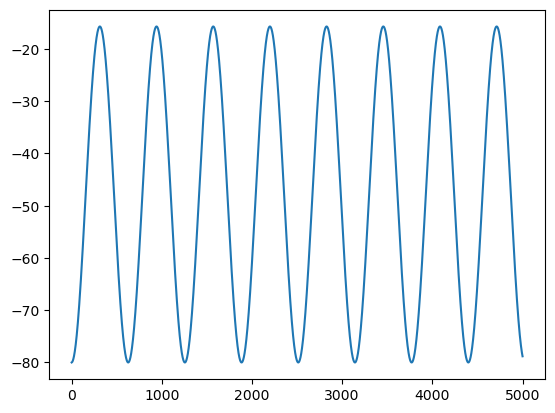

In [81]:
plt.plot(np.arange(1, n_iter + 1), z_arr);

## Solución analítica
---
La solución analítica de la posición del objeto se define respecto a un nivel de equilibrio:

$$z_e = \left(\frac{\rho_{\mathrm{obj}}}{\rho_{0}} - 1\right) \frac{g}{N^2}$$

Por tanto la solución analítica de la posición del objeto respecto al nivel de equilibrio es:

$$z^{*}(t)=z_{0}^{*}~\cos(N t)$$

Donde:
> * $z_{0}^{*}$ : posición inicial respecto a la posición de equilibrio 

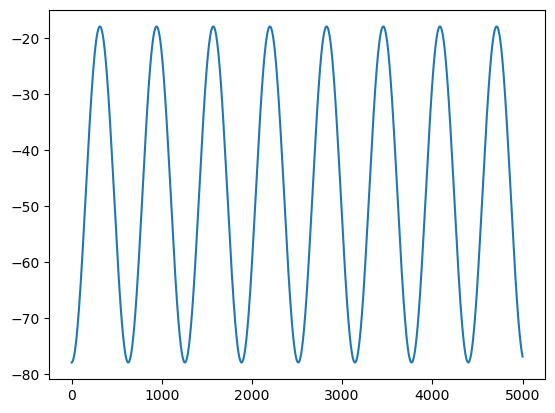

In [117]:
t_arr = np.arange(1, 5001)
z_0 = -30 # m
eq_level = ( (1025.5 / rho_0) - 1) * (g / N2)
N = 1e-2 # 1/s
# Solucion analitica
z_t = z_0 * np.cos(N * t_arr) 
plt.plot(t_arr, z_t - eq_level);

## Incluyendo la fricción
---
En el caso donde asumamos que existe fricción con el medio se aplica esta expresión:

$$\frac{d w_{\mathrm{obj}}}{d t}=-g\;\frac{(\rho_{\mathrm{obj}}-\rho_{\mathrm{amb}})}{\rho_{\mathrm{obj}}}-R w_{\mathrm{obj}}$$

Esto se puede discretizar con diferencias finitas:

$$w_{\mathrm{{n+1}}}^{obj}=\left[w_{\mathrm{{n}}}^{obj}-\Delta t\cdot g\;(\rho_{\mathrm{obj}}-\rho_{\mathrm{{amb}}})/\rho_{\mathrm{obj}}\right]/(1+R\Delta t)$$

$$z_{\mathrm{n+1}}^{obj}=z_{\mathrm{n}}^{obj}+\Delta t\cdot w_{\mathrm{n+1}}^{obj}$$

Donde:
> * $R$ : coeficiente de fricción $0 < R < 1$

In [112]:
# Coeficiente de friccion
R = 2e-3 # 1/s
dt = 1 # s
n_iter = 5000
# Condiciones iniciales
w_0 = 0
z_0 = -80
# Diferencias finitas
z_arr = np.array([], dtype=np.float64)
while z_arr.size < n_iter:
    w_n = ( w_0 - dt * g_red(1025.5, rho_z(z_0)) ) / (1 + R * dt) 
    z_n = z_0 + dt * w_n
    z_n = np.array(z_n, dtype=np.float64)
    z_arr = np.concatenate((z_arr, [z_n]))
    w_0 = w_n
    z_0 = z_n

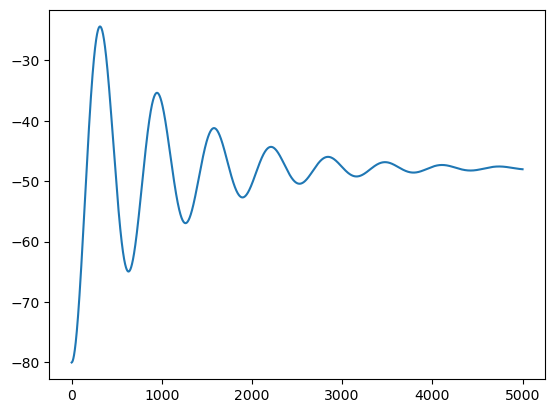

In [113]:
plt.plot(np.arange(1, n_iter + 1), z_arr);

In [ ]:
# Coeficiente de friccion
R = 2e-3 # 1/s
dt = 1 # s
n_iter = 5000
# Condiciones iniciales
w_0 = 0
z_0 = -80
# Diferencias finitas
z_arr = np.array([], dtype=np.float64)
while z_arr.size < n_iter:
    w_n = ( w_0 - dt * g_red(1025.5, rho_z(z_0)) ) / (1 + R * dt) 
    z_n = z_0 + dt * w_n
    z_n = np.array(z_n, dtype=np.float64)
    z_arr = np.concatenate((z_arr, [z_n]))
    w_0 = w_n
    z_0 = z_n